# <center>Оценка качества кластеризации. Внутренние меры
К сожалению, оценить качество кластеризации сложно, поскольку, в отличие от регрессии или классификации, при кластеризации у нас не всегда есть эталонные ответы, с которыми можно сравнить результаты предсказаний.

Выделяют две больших группы методов, с помощью которых можно оценить результат кластеризации:

>**Внутренние меры** — это метрики, которые оценивают качество кластеризации только по той информации, которая есть в неразмеченных данных.
>
>**Внешние меры** — это метрики, которые используют, если в данных есть информация о некотором заранее известном разделении на кластеры, с которым можно сравнить полученный результат.

Из-за большого количества признаков разбиение на кластеры может получиться некачественным и необходимо уменьшать размерность данных.

В библиотеке `sklearn` реализованы три наиболее популярные метрики:

* коэффициент силуэта (Silhouette Coefficient);
* индекс Калински — Харабаса (Calinski-Harabasz Index);
* индекс Дэвиса — Болдина (Davies-Bouldin Index).

# <center>Коэффициент силуэта

Коэффициент силуэта вычисляется по следующей формуле:
$$ s_i = \frac{b_i - a_i}{\max(a_i, b_i)} $$
где:
* $a_i$ — среднее расстояние от данного объекта  до объектов из того же кластера;
* $b_i$ — среднее расстояние от данного объекта  до объектов из другого ближайшего кластера.

Для того чтобы найти итоговое значение коэффициента силуэта для выборки, необходимо найти значения для остальных объектов и найти среднее значение для них.

Значение коэффициента силуэта всегда находится в диапазоне [−1,1].

* Значение близко к −1: объекты в кластерах разрознены, и в целом кластерную структуру не удалось выделить.
* Значение близко к 0: кластеры пересекаются друг с другом.
* Значение близко к 1: чёткая кластерная структура с «плотными», отделёнными друг от друга кластерами.

Также мы можем изобразить распределение коэффициентов силуэта для объектов отдельных кластеров.

Например, визуализация для двух кластеров будет такой:

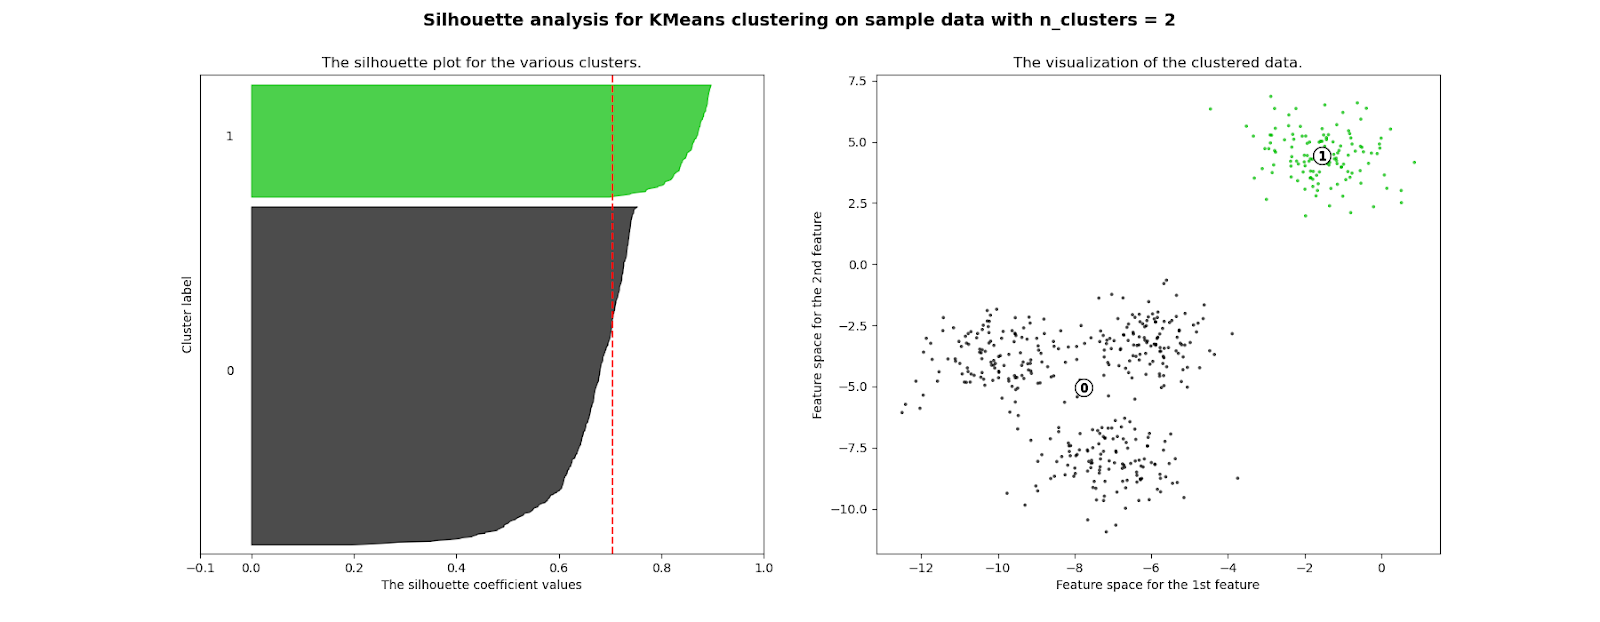  
На графике слева красной пунктирной линией здесь и далее отмечено среднее значение коэффициента силуэта для данного случая кластеризации. Разными цветами (серый и зелёный) визуализированы распределения значений коэффициентов силуэта для объектов соответствующих кластеров. На графике справа отмечены объекты, окрашенные в разные цвета в соответствии с их принадлежностью к кластерам.

Здесь мы видим, что «нулевой» кластер (серого цвета) включает в себя точки с более маленькими значениями. Это довольно хорошо соотносится с правой визуализацией, т. к. в сером кластере точки местами разрознены сильнее, чем в зелёном.

Для случая трёх кластеров ситуация будет следующей:

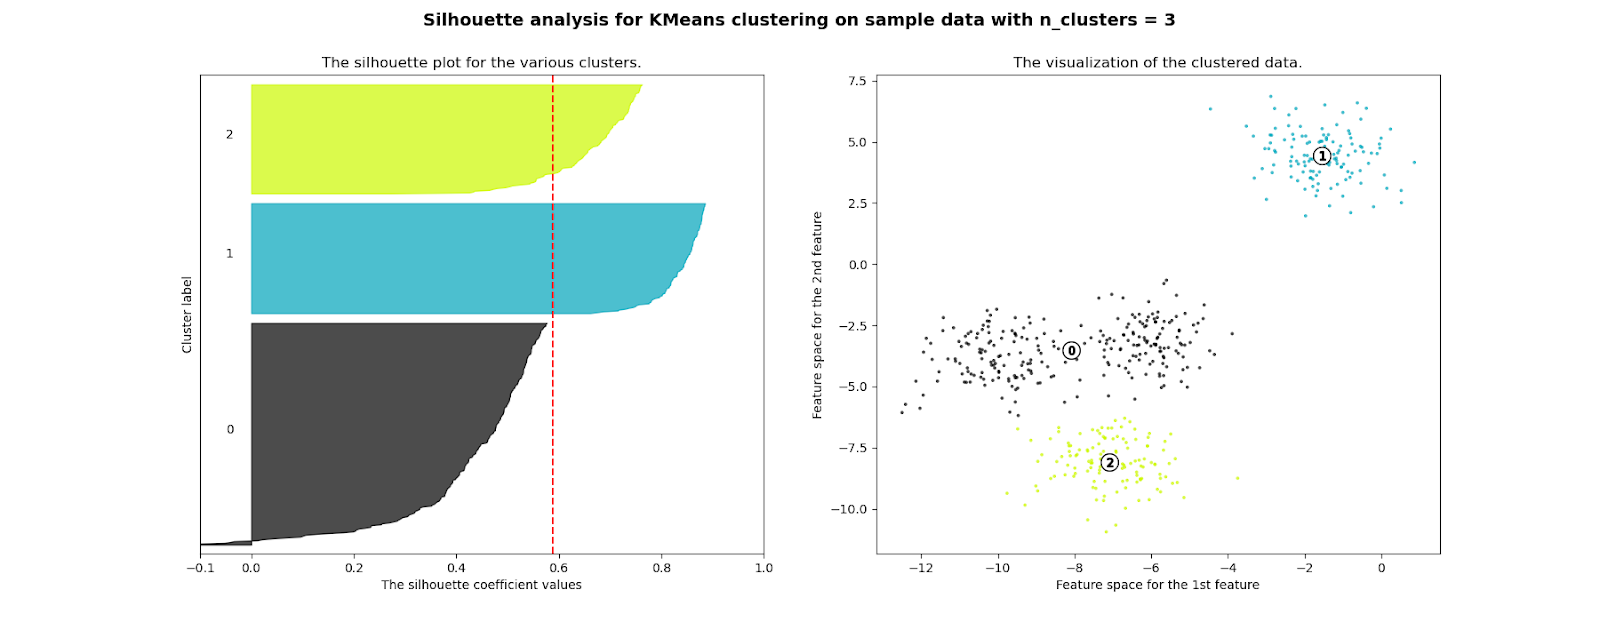

Довольно естественно (если посмотреть на график справа), что голубой кластер показывает наилучшую согласованность. У точек серого кластера коэффициенты всё так же самые низкие — явно напрашивается его разделение на ещё два кластера, и это действительно улучшает качество, так как значения коэффициентов силуэта увеличились (в новых сером и жёлтом кластерах они выше, чем были в предыдущем сером):

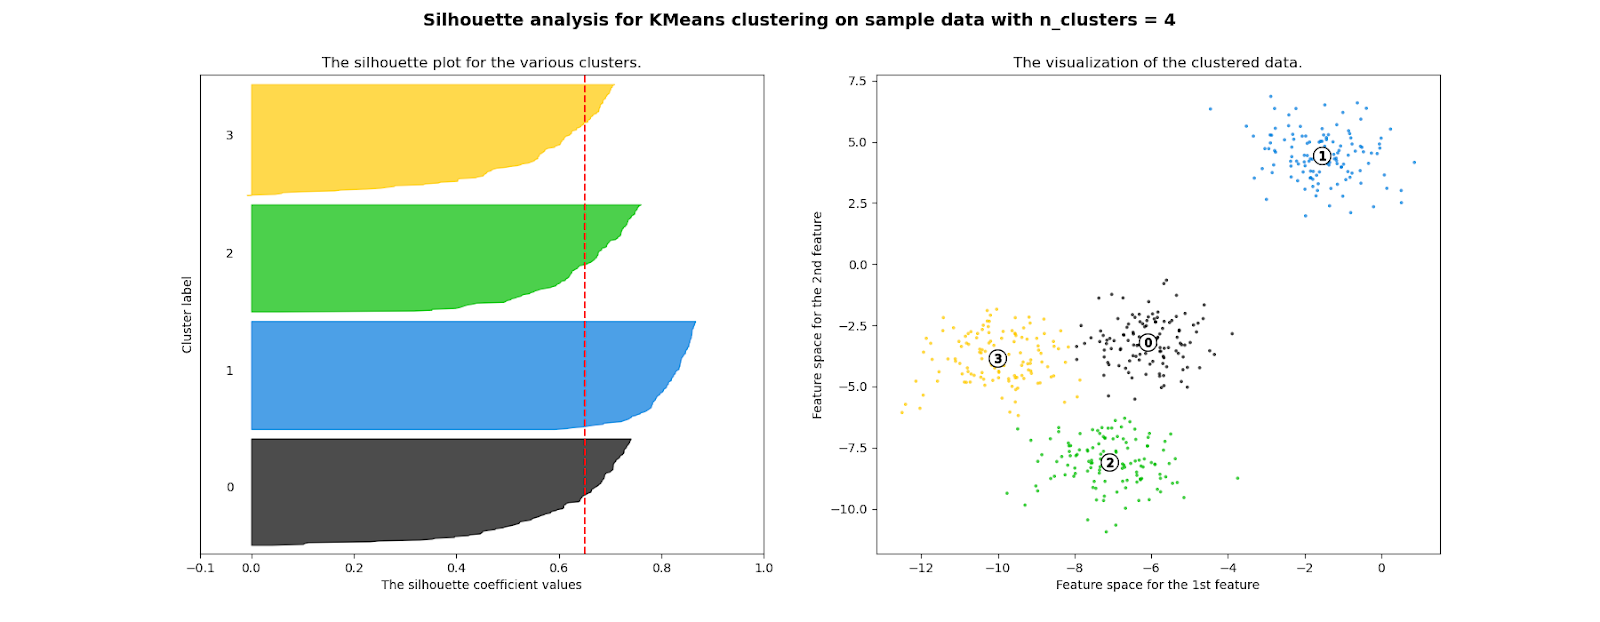

# <center>Индекс Калински-Харабаса
Он показывает отношение между разбросом значений между кластерами и разбросом значений внутри кластеров и вычисляется по следующей формуле:
$$ \frac{SS_B}{SS_W} \times \frac{N-K}{K-1} $$
* $N$ — общее количество объектов;
* $K$ — количество кластеров;
* $SS_B$ — взвешенная межкластерная сумма квадратов расстояний;
* $SS_W$ — внутрикластерная сумма квадратов расстояний.

**Первый шаг** — рассчитать взвешенную межкластерную сумму квадратов расстояний:
$$ SS_B = \sum^K_{k=1} n_k \times \|C_k - C\|^2 $$
* $n_k$ — количество наблюдений в кластере $k$;
* $C_k$ — центроид кластера $k$;
* $C$ — центроид всего набора данных;
* $K$ — количество кластеров.

**Второй шаг** — рассчитать внутрикластерную сумму квадратов.
$$ \sum_{i=1}^{n_k}\|X_{ik} - C_k\|^2 $$
* $n_k$ — количество наблюдений в кластере $k$;
* $X_{ik}$ — $i$-ое наблюдение в кластере $k$;
* $C_k$ — центроид кластера $k$.

Такое значение мы рассчитываем для каждого кластера, а потом уже складываем их для получения значения $SS_W$. 

Важно отметить, что нет никакого «приемлемого» порогового значения индекса — скорее, его можно использовать для того, чтобы сравнивать разные разбиения на кластеры между собой: более высокое значение индекса будет означать, что кластеры плотные (т. е. объекты внутри них находятся близко друг к другу) и хорошо разделены. Например, если бы мы отразили зависимость показателя индекса от количества кластеров, то по графику ниже могли бы сделать вывод, что оптимальное количество кластеров будет равно трём, так как именно для этого числа кластеров значение индекса наибольшее:

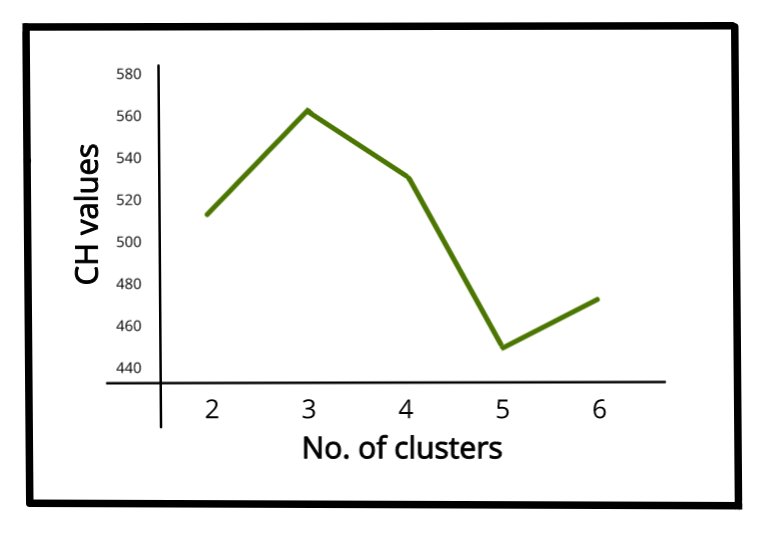

В библиотеке `sklearn` данный алгоритм реализуется с помощью метода `metrics.calinski_harabasz_score`.

# <center>Индекс Дэвиса-Болдина
**Первый шаг**

Для начала вычисляем для каждого кластера следующую **меру разброса значений** (в контексте этой формулы её называют **компактностью**) внутри него:
$$ S_k = \Big\{ \frac{1}{n_k}\sum_{i=1}^{n_k} |X_{ik} - C_k|^q \Big\}^{\frac{1}{q}} $$
* $n_k$ — количество наблюдений в кластере $k$;
* $X_{ik}$ — $i$-ое наблюдение в кластере $k$;
* $C_k$ — центроид кластера $k$;
* $q$ обычно принимает значение $2$ (в этом случае мы рассматриваем уже привычное нам евклидово расстояние).

**Второй шаг**

Далее находим **расстояния между центроидами кластеров** (этот показатель называют **отделимостью**):
$$ M_{ij} = \|C_i - C_j\|_q $$
Будем считать, что мы работаем с тремя кластерами. Используя приведённую выше формулу, вычислим меру отделимости для всех возможных комбинаций из трёх кластеров: $ M_{11}, M_{12}, M_{13}, M_{21}, M_{22}, M_{23}, M_{31}, M_{32}, M_{33} $

**Третий шаг**

Теперь для каждой пары кластеров вычисляем следующее отношение:
$$ R_{ij} = \frac{S_i + S_j}{M_{ij}} $$
Также для каждого кластера находим максимум из полученных значений:
$$ R_i \equiv \max(R_{ij}) $$

**Четвертый шаг**

Усредняем значения, найденные в предыдущем пункте, — это и будет итоговое значение индекса:
$$ \text{DBI} = \frac{1}{N}\sum_{i=1}^N R_i $$

**Интерпретация**  
Индекс показывает среднюю «схожесть» между кластерами, и 0 — это минимально возможное значение. Разумеется, так как мы хотим, чтобы кластеры были максимально различными (т. е. имели низкую схожесть), мы должны пытаться достичь как можно более маленького значения.

В библиотеке `sklearn` индекс Дэвиса — Болдина реализуется с помощью метода `metrics.davies_bouldin_score`.

# <center>Внутрикластерное расстояние
Для того чтобы оценить качество кластеризации, можно вычислить суммарное внутрикластерное расстояние:
$$ F_0 = \sum^K_{k=1} \sum^N_{i=1} \Big[a(x_i) = k \Big] \rho(x_i, c_k) $$
В данном случае $\rho(x, c)$ — это некоторая функция расстояния (например, эвклидово).

В формуле заложен индикатор того, принадлежит ли объект кластеру, и мы проходимся по всем объектам ($N$) и всем кластерам ($K$). С помощью этого индикатора мы выясняем для каждого объекта, принадлежит ли он к данному кластеру, и, если да, считаем расстояние до центроида кластера.

Разумеется, сумма этих расстояний должна быть минимальной — это тот случай, когда все элементы кластера совпадают с центроидом.

# <center>Межкластерное расстояние
Аналогично суммарному внутрикластерному расстоянию, вводится межкластерное расстояние:
$$ F_1 = \sum^N_{ij=1} \Big[ a(x_i) \neq a(x_j) \Big] \rho(x_i, x_j) $$
Мы проверяем, что предсказания о принадлежности к кластеру не равны (т. е. объекты относятся к разным кластерам), и считаем расстояние между этими объектами (можем использовать различные функции расстояний). Здесь мы, разумеется, будем максимизировать результат, так как нам важно, чтобы элементы из разных кластеров были как можно меньше похожи друг на друга, а значит, чтобы расстояние между ними было как можно больше.

# <center>Отношение расстояний
Логичным образом из предыдущих двух метрик (внутрикластерного и межкластерного расстояний) мы получаем отношение расстояний:
$$ \frac{F_0}{F_1} \to \min $$
Таким образом мы можем учитывать оба функционала, рассмотренные ранее (расстояние внутри кластера и между кластерами), и оптимизировать отношение расстояний. Естественно, нам нужно, чтобы оно было минимальным — это будет достигаться, если расстояние между кластерами максимально, а внутри кластера — минимально.

|ВНУТРЕНЯЯ МЕРА|ИНТЕРПРЕТАЦИЯ|ДИАПАЗОН ЗНАЧЕНИЙ|
|-|-|-|
|Коэффициент силуэта|Мера того, насколько объект похож на объекты из своего собственного кластера по сравнению с объектами из других кластеров.|От -1 до 1: при качественной кластеризации значение близко к 1.|
|Индекс Калински — Харабаса|Показывает отношение между разбросом значений между кластерами и разбросом значений внутри кластеров. Оценка выше, когда кластеры плотные и хорошо разделены.|Любое неотрицательное значение. Чем больше значение, тем лучше.|
|Индекс Дэвиса — Болдина|Показывает среднюю «схожесть» между кластерами.|Не менее 0. Чем меньше значение, тем лучше.|
|Внутрикластерное расстояние|Показывает, насколько плотно расположены объекты в кластерах.|Не менее 0. Чем меньше значение, тем лучше.|
|Межкластерное расстояние|Показывает, насколько далеки друг от друга элементы из разных кластеров.|Не менее 0. Чем больше значение, тем лучше.|

# <center>Оценка качества кластеризации. Внешние меры
# <center>Индекс Рэнда
В целом, это не совсем метрика для оценки качества кластеризации: индекс Рэнда — это мера сходства между двумя кластеризациями. Однако, так как он позволяет сравнить два разбиения на кластеры, мы можем использовать его для сравнения фактических меток классов и прогнозируемых меток кластеров, тем самым оценивая качество наших алгоритмов.

Данный индекс сравнивает фактическое разбиение и результат применения алгоритма кластеризации и оценивает, сколько пар, находившихся в одном или в разных кластерах, сохранили это состояние.

Индекс Рэнда вычисляется по следующей формуле:
$$ \text{RI}=\frac{2(a+b)}{N(N-1)} $$
где
* $N$ — количество объектов в выборке;
* $a$ — число пар объектов, которые имеют одинаковые метки (т. е. в фактическом разбиении находятся в одном классе) и располагаются в одном кластере;
* $b$ — число пар объектов, которые имеют различные метки (т. е. в фактическом разбиении находятся в разных классах) и располагаются в разных кластерах.

По сути, в этом индексе вычисляется доля пар, для которых сохранилось их расположение по отношению друг к другу.

Для вычисления индекса Рэнда с помощью библиотеки `sklearn` можно использовать метод `metrics.rand_score`:

Также используют **скорректированный индекс Рэнда (Adjusted Rand Index)**:
$$ \text{ARI}=\frac{\text{RI}-E[\text{RI}]}{\max(\text{RI}) - E[\text{RI}]} $$
Его преимущество перед обычным индексом Рэнда состоит в том, что при случайных кластеризациях его значение близко к нулю вне зависимости от количества кластеров и наблюдений.

Исправленный индекс Рэнда в `sklearn` представлен через метод `metrics.adjusted_rand_score`.

Интерпретация скорректированного индекса Рэнда:
* Отрицательные значения индекса говорят о различных, независимых разбиениях.
* Значения, близкие к нулю, являются индикаторами случайного разбиения.
* Положительные значения показывают схожесть разбиений (значение, равное $1$, получается при полном совпадении кластеризаций).

# <center>Нормализованная взаимная информация
**NMI (Normalized Mutual Information)**, или **нормализованная взаимная информация**. Она определяется следующим образом:
$$ \text{NMI}(Y_{\text{true}}, Y_{\text{pred}}) = \frac{2 \times I(Y_{\text{true}};Y_{\text{pred}})}{[H(Y_{\text{true}}) + H(Y_{\text{pred}})]} $$
Здесь:
* $Y_{\text{true}}$ — реальные значения меток кластеров для элементов;
* $Y_{\text{pred}}$ — предсказанные значения меток кластеров для элементов;
* $H()$ — функция, которая называется критерием информативности, или энтропией Шеннона;
* $I()$ — функция взаимной информации.

$$ H(Y_{\text{true}}) = -\sum_{i=1}^n P(y_i) * \log P(y_i) $$
* $n$ — количество объектов;
* $y_i$ — различные значения принадлежности к кластерам.

$$I(Y_{\text{true}};Y_{\text{pred}}) = H(Y_{\text{true}}) - \sum_{k=1}^K H_k(Y_{\text{true}} | Y_{\text{pred}} = k) $$

В `sklearn` для вычисления **NMI** существует метод `metrics.normalized_mutual_info_score`.

С точки зрения оценки качества разбиения коэффициент должен быть как можно ближе к единице: нулевое значение указывает на случайное разбиение, а 1 — на максимальную согласованность.

# <center> Однородность
**Однородность** (ещё её называют **гомогенностью**) показывает, насколько элементы в кластере похожи между собой, и вычисляется по следующей формуле:
$$ \text{homogeneity} = 1 - \frac{H(Y_{\text{true}}|Y_{\text{pred}})}{H(Y_{\text{true}})} $$

Однородность также можно вычислить, воспользовавшись методом `metrics.homogeneity_score` из библиотеки `sklearn`.

Важно, чтобы показатель гомогенности был как можно ближе к единице: это говорит о том, что в кластере находятся элементы одного и того же класса. Если он близок к нулю, это означает, что в кластере находятся элементы из разных классов.

# <center>Полнота
Результат кластеризации удовлетворяет требованиям полноты, если все элементы данных, принадлежащие к одному классу, оказались в одном кластере.
$$ \text{completeness} = 1 - \frac{H(Y_{\text{pred}}|Y_{\text{true}})}{H(Y_{\text{pred}})} $$
Для вычисления полноты с помощью библиотеки `sklearn` используется метод `metrics.completeness_score`.

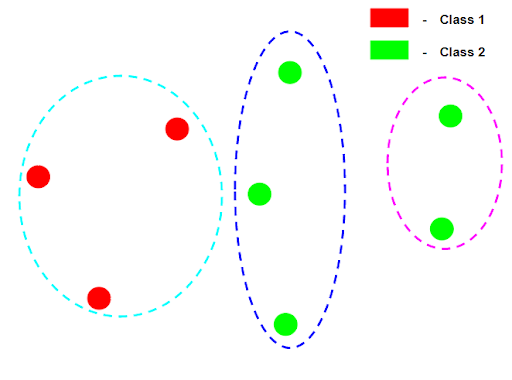  
**Однородность** на данной диаграмме максимальна, так как в каждом кластере объекты имеют одну и ту же метку класса, однако **полнота**, наоборот, низкая, так как не все точки одной метки попали в один кластер.

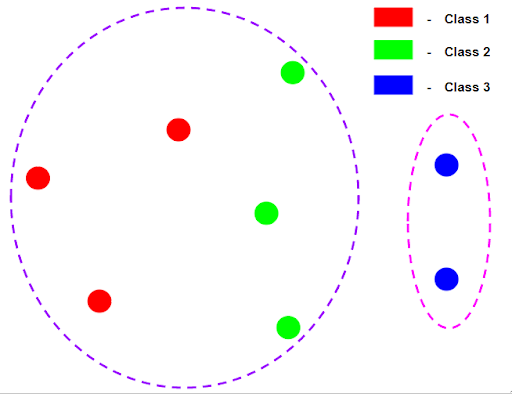  
А вот на этой диаграмме **полнота** максимальная, так как все объекты одного класса находятся в одном и том же кластере, но при этом **однородность** низкая, так как в первом кластере находятся объекты из разных классов.

# <center>V-мера
Мы уже выяснили, что лучше рассматривать несколько мер сразу, так как каждая мера в отдельности может показывать высокое качество даже для плохого разбиения. В ответ на такую необходимость появляется метрика, которая является комбинацией метрик полноты и однородности и вычисляется как их гармоническое среднее, — это **V-мера**:
$$ v = \frac{(1+\beta) \times \text{homogeneity} \times \text{completeness}}{(\beta \times \text{homogeneity} + \text{completeness})} $$
По-умолчанию $\beta=1$, но это значение можно варьировать, если хочется придать разный вес разным свойствам:
* Если **однородность** кластеров важнее, чем их **полнота**, следует указать значение $\beta < 1$. Тогда значение $\beta \times \text{homogeneity}$ в знаменателе получится небольшим и тем самым будет сильнее влиять на значение $v$. Чем меньше $\beta \times \text{homogeneity}$, тем выше $v$.
* Если **однородность** кластеров не особо важна, но важно, чтобы каждый кластер содержал **максимальное количество похожих объектов**, тогда мы регулируем значение $\beta$ так, чтобы оно было больше $1$.

Значение V-меры варьируется от $0$ до $1$. Метрика будет равна  только в том случае, если кластеры будут однородными и полными **одновременно**.

Для вычисления V-меры с помощью библиотеки `sklearn` используется метод `metrics.v_measure_score`.

|МЕТРИКА|ИНТЕРПРЕТАЦИЯ И ПРИМЕНЕНИЕ|ДИАПАЗОН ЗНАЧЕНИЙ|
|-|-|-|
|Однородность (*homogeneity score*)|Показывает, насколько однородны получившиеся кластеры. Если в кластере оказались элементы из другого кластера, значение метрики уменьшается.|1 — идеально однородные кластеры; 0 — кластеры максимально разнородные.|
|Полнота (*completeness score*)|Показывает, насколько кластер заполнен объектами, которые в действительности должны принадлежать к этому кластеру.|1 — идеальное значение; 0 — объекты, которые должны образовывать один кластер, разделились на большее количество кластеров.|
|V-мера (*V-measure*)|Комбинация метрик полноты и однородности кластеров.|1 — идеально полные и однородные кластеры; 0 — полученные кластеры неоднородные, количество кластеров слишком большое.|
|Индекс Рэнда|Показывает долю объектов датасета, которые мы правильно определили в кластер.|1 — все объекты в предсказанном кластере попали в правильные кластеры.|
|Нормализованная взаимная информация|Показывает, насколько разбиение согласуется с реальными метками.|1 — максимальная согласованность, все объекты находятся в правильных кластерах; 0 — случайное разбиение.|

# <center>PCA
Размерность данных отражает количество содержащихся в них признаков. Если признаков очень много, можно столкнуться с **проклятием размерности**.

>**Проклятие размерности** — это проблема, связанная с экспоненциальным возрастанием объёма данных из-за увеличения размерности пространства.

Если размерность данных слишком велика, их обработка занимает чрезвычайно много времени, а их хранение требует большого объёма памяти, что, конечно, в целом затрудняет процесс работы. Поэтому количество признаков в данных необходимо уменьшить.

**Основные подходы к снижению размерности**
1. **Удаление (фильтрация) признаков**

    Удаление признаков может быть подходящим вариантом, когда, например, в них есть некорректные данные или так много пропусков, что эту информацию нельзя использовать для построения модели. Иногда удаляют малоинформативные признаки, которые принимают одни и те же значения или у которых очень слабая корреляция с целевой переменной. Есть и более сложные методы фильтрации — сейчас мы не будем на них останавливаться, однако обратим ваше внимание, что при удалении признаков мы практически всегда теряем какую-то информацию о данных.
2. **Извлечение новых признаков с помощью специальных алгоритмов**

    Создание новых признаков не даёт потерять важную информацию. Допустим, в нашем наборе данных есть 100 признаков. При извлечении признаков мы отказываемся от старых и создаём 100 новых независимых (таких, между которыми коэффициент корреляции равен нулю). Каждый новый признак представляет собой комбинацию старых. Независимые новые признаки определяются специальным алгоритмом (например, PCA) и упорядочиваются  по тому, насколько хорошо они сохраняют информацию о данных. После этого можно отбросить наименее важные новые признаки в зависимости от того, какую объяснённую дисперсию необходимо сохранить: допустим, первые 80 признаков из извлечённых 100 объясняют 95 % дисперсии и нас устраивает такой процент. Значит, мы отбрасываем последние 20 новых признаков.

    В результате множества исследований было выявлено, что такое отбрасывание части новых признаков совершенно не мешает получать модели машинного обучения, которые будут показывать высокую эффективность. Например, для распознавания лиц достаточно использовать лишь треть извлечённых из фотографий признаков, а для обнаружения лактозы в безлактозном молоке NIR-спектроскопией будет достаточно извлечь с помощью PCA всего лишь два признака из 601.

Представим, что мы хотим описать форму рыбы. Это можно сделать, например, с помощью её высоты (height) и длины (length):

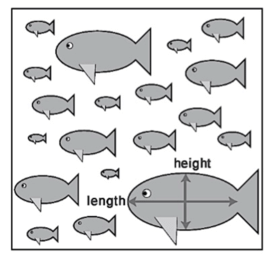

Однако, разумеется, эти признаки не являются независимыми друг от друга и довольно сильно коррелируют. Зная одно измерение для рыбы, мы, скорее всего, сможем предсказать по нему второе, то есть, по сути, мы можем описать форму рыбы с помощью только одного показателя. Причём важно отметить, что, когда мы говорим про один показатель, мы не отбрасываем длину рыбы или её высоту — вместо этого мы преобразуем эти два исходных признака в две ортогональные (независимые) компоненты, которые полностью описывают форму рыбы:

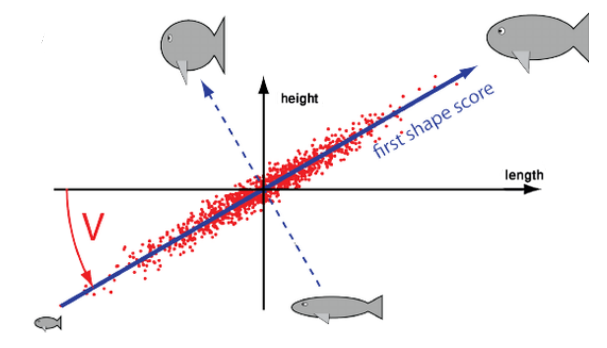

Первая компонента (сплошная синяя стрелка) объясняет бόльшую часть вариации данных, а вторая (пунктирная синяя стрелка) — оставшуюся часть вариации. Обе они являются производными от высоты и длины.

На интуитивном уровне первую компоненту можно рассматривать как наиболее подходящий для описания данных вектор, который сводит к минимуму потерю информации. С другой стороны, её также можно рассматривать как линию, максимизирующую вариацию. В целом, если первая компонента объясняет достаточный для нас процент дисперсии, мы можем «отбросить» вторую.

Итак, в PCA признаки преобразуются в новый набор переменных с меньшим (или таким же) количеством измерений, сохраняя при этом как можно больше вариаций, присутствующих в наборе данных. Геометрически это значит, что метод главных компонент ищет гиперплоскость заданной размерности, при проекции на которую сумма квадратов расстояний от исходных точек будет минимальной. Это проиллюстрировано на анимации ниже:

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/9fa447b58cc57a0d9f4e8399196c80e7/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/MATHML_md11_5_3.gif)

Здесь мы хотим преобразовать два признака в один и ищем такой наклон прямой (новой компоненты), чтобы её сумма квадратов отклонений от объектов была минимальной.

**АЛГОРИТМ РЕАЛИЗАЦИИ PCA**

1. Стандартизировать данные.
2. Рассчитать ковариационную матрицу для объектов.
3. Рассчитать собственные значения и собственные векторы для ковариационной матрицы.
4. Отсортировать собственные значения и соответствующие им собственные векторы.
5. Выбрать $k$ наибольших собственных значений и сформировать матрицу соответствующих собственных векторов.
6. Преобразовать исходные данные, умножив матрицу данных на матрицу отобранных собственных векторов.

`sklearn.decomposition.PCA`  
В параметр `n_components` в качестве значения можно передать количество необходимых компонентов или минимально допустимую объяснённую дисперсию в виде десятичной дроби. Например, если нам нужно столько компонент, чтобы они объясняли не менее 90 % разброса данных, то мы запишем `n_components=0.9`.



# <center>SVD
**Сингулярное разложение (SVD)** используется не только для снижения размерности, но и в целом имеет множество применений в машинном обучении, например, в рекомендательных системах.

Суть сингулярного разложения заключается в следующей теореме ↓

Любую прямоугольную матрицу  размера  можно представить в виде произведения трёх матриц:
$$ A_{n \times m} = U_{n \times n} \cdot D_{n \times m} \cdot V_{m \times m}^T $$
В этой формуле:
* $U$ — матрица размера $(n, n)$. Все её столбцы ортогональны друг другу и имеют единичную длину. Такие матрицы называются **ортогональными**. Эта матрица содержит нормированные собственные векторы матрицы $AA^T$.
* $D$ — матрица размера $(n, m)$. На её главной диагонали стоят числа, называемые **сингулярными числами** (они являются корнями из собственных значений матриц $AA^T$ и $A^TA$), а вне главной диагонали стоят нули. Если мы решаем задачу снижения размерности, то элементы этой матрицы, если их возвести в квадрат, можно интерпретировать как дисперсию, которую объясняет каждая компонента.
* $V$ — матрица размера $(m, m)$. Она тоже ортогональная и содержит нормированные собственные векторы матрицы $A^TA$.

Допустим, нам необходимо получить сингулярное разложение для следующей матрицы:
$$ A = \begin{pmatrix} -1 & 1 & 0 \\ -1 & -1 & 1 \end{pmatrix} $$
Начнём с поиска матрицы $U$. Для этого нам необходимо сначала вычислить произведение матриц $A$ и $A^T$:
$$ A \cdot A^T = \begin{pmatrix} 2 & 0 \\ 0 & 3 \end{pmatrix} $$
Теперь нам необходимо решить характеристическое уравнение $\det(AA^T - \lambda E)=0$:
$$ \det(AA^T - \lambda E) = \begin{vmatrix} 2-\lambda & 0 \\0 & 3-\lambda \end{vmatrix} $$
Выражаем значение определителя и приравниваем его к нулю:
$$ (2-\lambda) \cdot (3-\lambda) - 0 \cdot 0 = 0 $$
Получаем два собственных значения:
$$ \lambda_1 = 2, \space \lambda_2 = 3 $$
Теперь можно извлечь из них корень и получить сингулярные значения (они нужны для матрицы $D$):
$$ \sigma_1 = \sqrt{2}, \space \sigma_2 = \sqrt{3} $$
Найдём собственный вектор, который соответствует первому собственному значению. Для этого решим следующее уравнение:
$$ (AA^T - \lambda_1 E)\vec{v} = 0 $$
$$ \begin{pmatrix} 2-2 & 0 \\ 0 & 3 -2 \end{pmatrix} \cdot \vec{v}_1 = 0 $$
$$ \vec{v}_1 = \begin{pmatrix} -1 \\ 0 \end{pmatrix} $$
Аналогично получаем второй вектор:
$$ \vec{v}_2 = \begin{pmatrix} 0 \\ -1 \end{pmatrix} $$
Нормируем их:

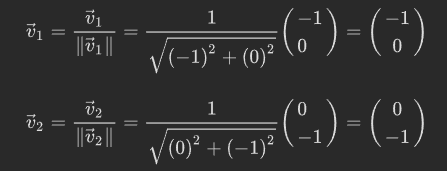

Отлично, мы нашли векторы, чтобы составить матрицу $U$.

Далее для нахождения матрицы $V$ нам необходимо вычислить произведение матрицы $A^T$ на матрицу $A$:
$$ A^TA = \begin{pmatrix} 2 & 0 & -1 \\ 0 & 2 & -1 \\ -1 & -1 & 1 \end{pmatrix} $$
Находим собственные значения для получившейся матрицы:
$$ \det(A^TA - \lambda E) = \lambda_{A^TA} = \begin{vmatrix} 2 - \lambda & 0 & -1 \\ 0 & 2 - \lambda & -1 \\ -1 & -1 & 1 - \lambda \end{vmatrix} $$
Выражаем определитель и производим элементарные преобразования, чтобы упростить выражение, получаем следующие собственные значения:
$$ \lambda_1 = 3, \space \lambda_2 = 2, \space \lambda_3 = 0 $$
Далее нужно найти сингулярные значения. Для этого просто извлечём корни из собственных значений:
$$ \sigma_1 = \sqrt{3}, \space \sigma_2 = \sqrt{2}, \space \sigma_3 = 0 $$
Теперь мы можем составить диагональную матрицу $D$:
$$ D \in \mathbb{R}^{2 \times 3}, \space D = \begin{pmatrix} \sqrt{3} & 0 & 0 \\ 0& \sqrt{2} & 0 \end{pmatrix} $$
Далее находим собственные векторы:
$$ (A^TA - \lambda_1 E)\vec{v} = 0 $$
$$ \lambda_1 = 3 $$
$$ \cdots \vec{v}_1 = \begin{pmatrix} 1 \\ 1 \\ -1 \end{pmatrix} $$
Аналогичным образом находим ещё два собственных вектора. Первый из них (соответствующий собственному значению 2) будет равен $\begin{pmatrix} 1 \\ -1 \\ 0 \end{pmatrix}$, а 2-й - $\begin{pmatrix} 1 \\ 1 \\ 2 \end{pmatrix}$
Далее нам необходимо нормировать найденные собственные векторы:
$$ \vec{v}_1 = \frac{1}{\sqrt{3}} \cdot (1, \space 1, \space -1)^T $$
$$ \vec{v}_2 = \frac{1}{\sqrt{2}} \cdot (1, \space -1, \space 0)^T $$
$$ \vec{v}_3 = \frac{1}{\sqrt{6}} \cdot (1, \space, 1, \space, 2)^T $$
Теперь мы можем записать соответствующую матрицу $V$. Для этого полученные собственные векторы располагаем в столбцах матрицы в порядке убывания их собственных чисел:
$$ V = \frac{1}{\sqrt{6}} \cdot \begin{pmatrix} \sqrt{2} & \sqrt{3} & 1 \\ \sqrt{2} & -\sqrt{3} & 1 \\ -\sqrt{2} & 0 & 2 \end{pmatrix} $$
Теперь собираем все полученные матрицы и в итоге получаем следующее сингулярное разложение:
$$ A = UDV^T = \begin{pmatrix}0 & -1 \\ -1 & 0\end{pmatrix} \times \begin{pmatrix} \sqrt{3} & 0 & 0 \\ 0 & \sqrt{2} & 0 \end{pmatrix} \times \frac{1}{\sqrt{6}} \cdot \begin{pmatrix} \sqrt{2} & \sqrt{2} & -\sqrt{2} \\ \sqrt{3} & -\sqrt{3} & 0 \\ 1 & 1 & 2 \end{pmatrix} $$
Здесь вы видите полное сингулярное разложение. Однако если мы захотим уменьшить размерность, то можем просто отобрать $n$ наибольших собственных значений и записать разложение для них.

Для того чтобы реализовать сингулярное разложение с помощью библиотеки `sklearn`, необходимо использовать алгоритм `decomposition.TruncatedSVD()`, в который передаётся `n_components` в качестве параметра, определяющего количество итоговых компонент:
```python
# создаём объект класса TruncatedSVD
# n_components — размерность нового пространства, n_iter — количество итераций
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
# обучаем модель на данных X
svd.fit(X)
# применяем уменьшение размерности к матрице X
transformed = svd.transform(X)
```

# <center>t-SNE
**t-SNE (стохастическое вложение соседей с t-распределением)**. Его преимущество относительно первых двух заключается в том, что он может реализовывать уменьшение размерности и разделение для данных, которые являются линейно неразделимыми. Подобные данные можно визуализировать так:

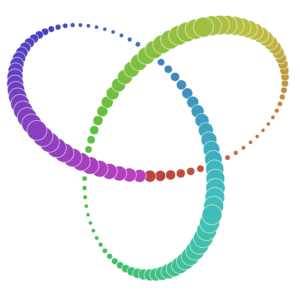
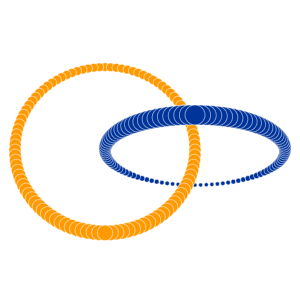

Предположим, что у нас есть набор данных, состоящий из трёх различных классов:

Мы хотим снизить размерность, уменьшив число признаков с двух до одного, сохраняя при этом чёткие границы между кластерами:

Простая проекция точек на прямую будет плохим вариантом, так как мы потеряем значительный объём информации (на графике ниже можно видеть, что точки, находящиеся далеко друг от друга, на прямой оказываются близко):

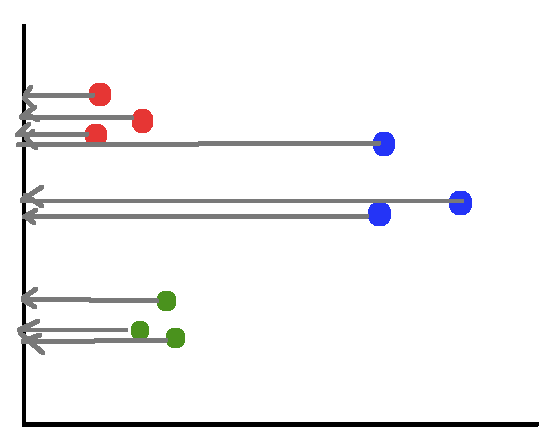

Вместо этого можно использовать технику уменьшения размерности (*t-SNE*). Первый шаг в алгоритме *t-SNE* включает в себя измерение расстояния от одной точки до всех остальных. Изначально эти расстояния измеряются с помощью обычного евклидова расстояния, а затем сопоставляются со значениями вероятностей:

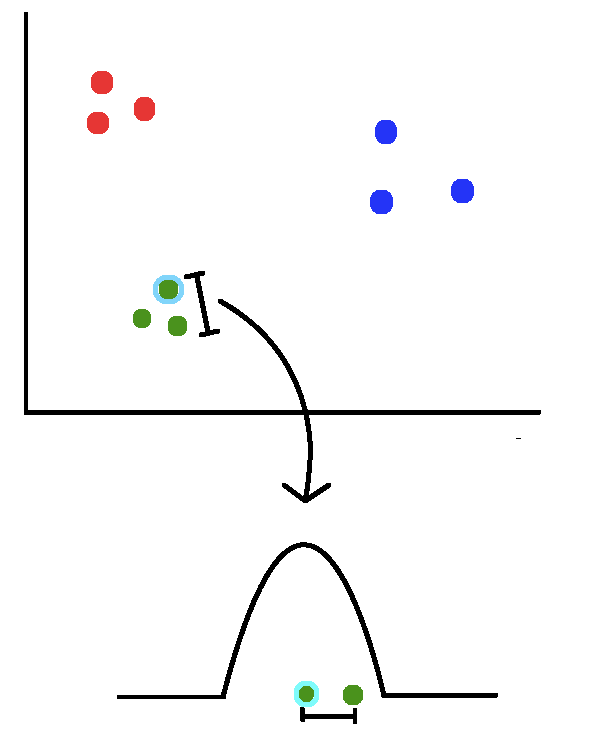

В получившемся распределении точки с наименьшим расстоянием до рассматриваемой точки имеют высокую вероятность быть её соседями, а точки, удалённые от рассматриваемой точки, имеют очень низкие вероятности быть её соседями. По сути, вероятность пропорциональна расстоянию.

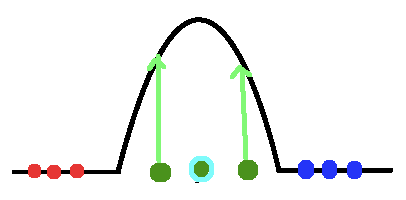

Однако здесь возникает следующая проблема: у разных кластеров разная плотность. Чтобы учитывать информацию об этом, мы будем нормировать каждую вероятность на сумму вероятностей для точек этого кластера:

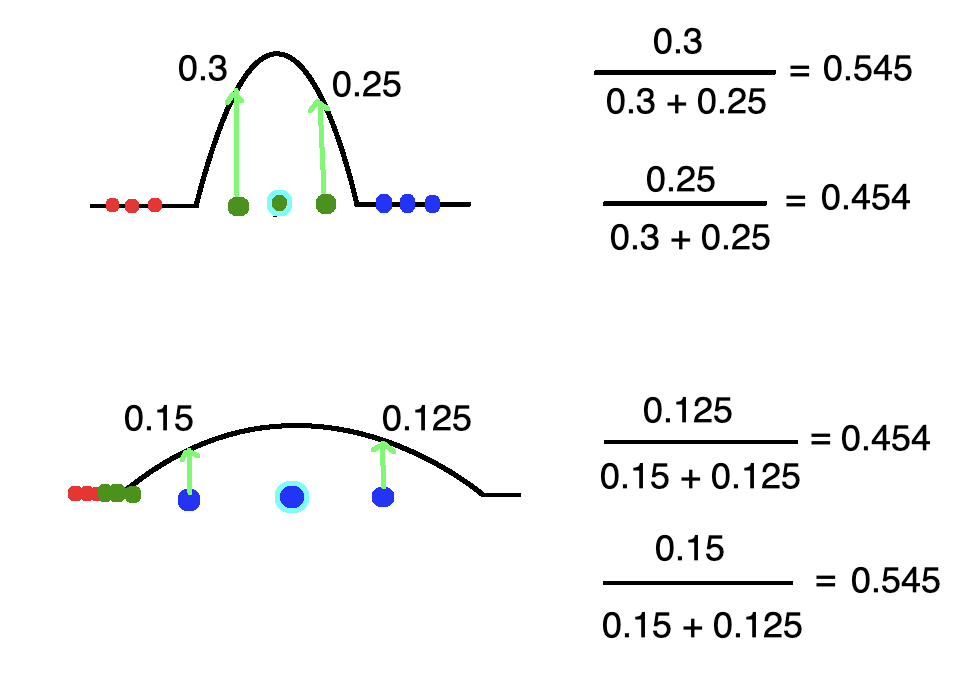

Таким образом, хотя абсолютное (евклидово) расстояние между точками различно, показатель близости для них получается одинаковым.

Функция плотности для нормального распределения записывается следующим образом:
$$ P(x) = \frac{1}{\sigma \sqrt{2 \pi}}e^{-(x-\mu)^2 / (2\sigma^2)} $$
Если мы опустим множитель перед экспонентой, заменим среднее арифметическое на другую точку и отмасштабируем полученное значение, то получим следующее выражение:
$$ p_{j|i} = \frac{\exp \Big(-\|x_i - x_j\|^2 / 2\sigma^2_i \Big)}{\sum_{k \neq i} \exp \Big( -\|x_i - x_k\|^2 / 2 \sigma^2_i \Big)} $$
Таким образом мы можем вычислить показатель, отражающий, насколько точка $x_j$ близка к точке $x_i$ при гауссовском распределении, сформированном с математическим ожиданием, равным $x_i$, и с некоторым $\sigma$, которое выбирается таким образом, чтобы у объектов в областях с большей плотностью была более маленькая дисперсия.

Теперь давайте рассмотрим оценки близости для точек, которые получились в результате снижения размерности. Найдём для них ровно тот же показатель:
$$ q_{j|i} = \frac{\exp \Big(-\|y_i - y_j\|^2 \Big)}{\sum_{k \neq i} \exp \Big(-\|y_i - y_k\|^2 \Big)} $$
Считаем, что $x_i$ переходит в $y_i$, $x_j$ переходит в $y_j$ и так далее.

Если между точками $y_i$ и $y_j$ будет такое же сходство, как и между изначальными точками $x_i$ и $x_j$, то значения соответствующих условных вероятностей $p_{j|i}$ и $q_{j|i}$ будут эквивалентными. Чтобы оценить, насколько $q_{j|i}$ близко к $p_{j|i}$, используется **дивергенция (расстояние) Кульбака — Лейблера** (иногда его обозначают просто как **KL**). Чем ниже значение расстояния KL, тем ближе два распределения друг к другу. Расстояние KL, равное 0, подразумевает, что два рассматриваемых распределения идентичны.

Ниже вы можете видеть сравнение распределений и значение расстояния Кульбака — Лейблера для них:

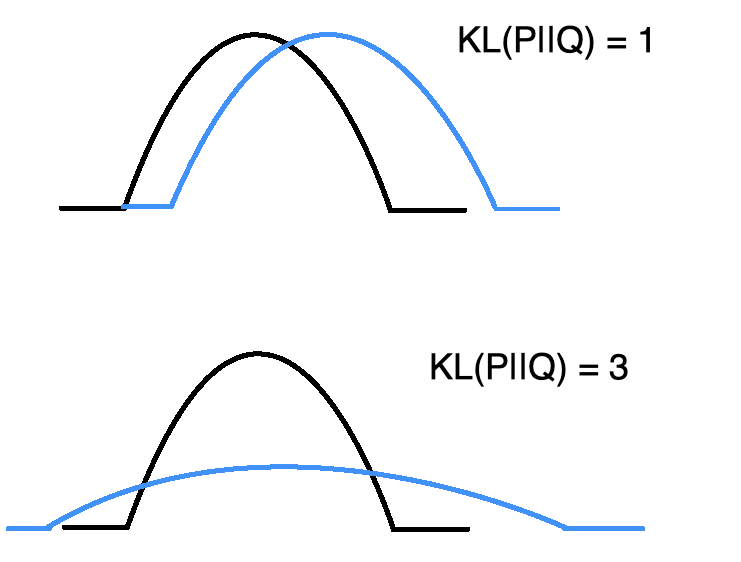

Ранее, для того чтобы найти наиболее подходящую функцию, описывающую наши данные, мы применяли градиентный спуск для минимизации функционала ошибки. Здесь мы будем использовать ту же идею — будем минимизировать KL-расстояние с помощью градиентного спуска. Тогда функция потерь будет выражаться следующим образом:
$$ C = \sum_i \text{KL}(P_i \| Q_i) = \sum_i \sum_j p_{j|i} \log \frac{p_{j_i}}{q_{j|i}} $$
Берём частную производную нашей функции потерь по каждой точке:
$$ \frac{\partial C}{\partial y_i} = 2 \sum_j (p_{j|i} - q_{j|i} + p_{i|j} - _{i|j})(y_i - y_j) $$
Мы рассмотрели классический вариант **SNE**, однако при его использовании мы сталкиваемся с проблемой: после снижения размерности расстояние между двумя точками **должно быть значительно больше** () расстояния, которое можно получить в гауссовом распределении. Эту проблему называют **«проблемой скученности»**, и для её решения используют **распределение Стьюдента**. Оно похоже на распределение Гаусса (и для больших выборок практически совпадает с ним), однако имеет большие вероятности на участках, отдалённых от нуля. Сравнение распределений Гаусса и Стьюдента можно увидеть на графике ниже:

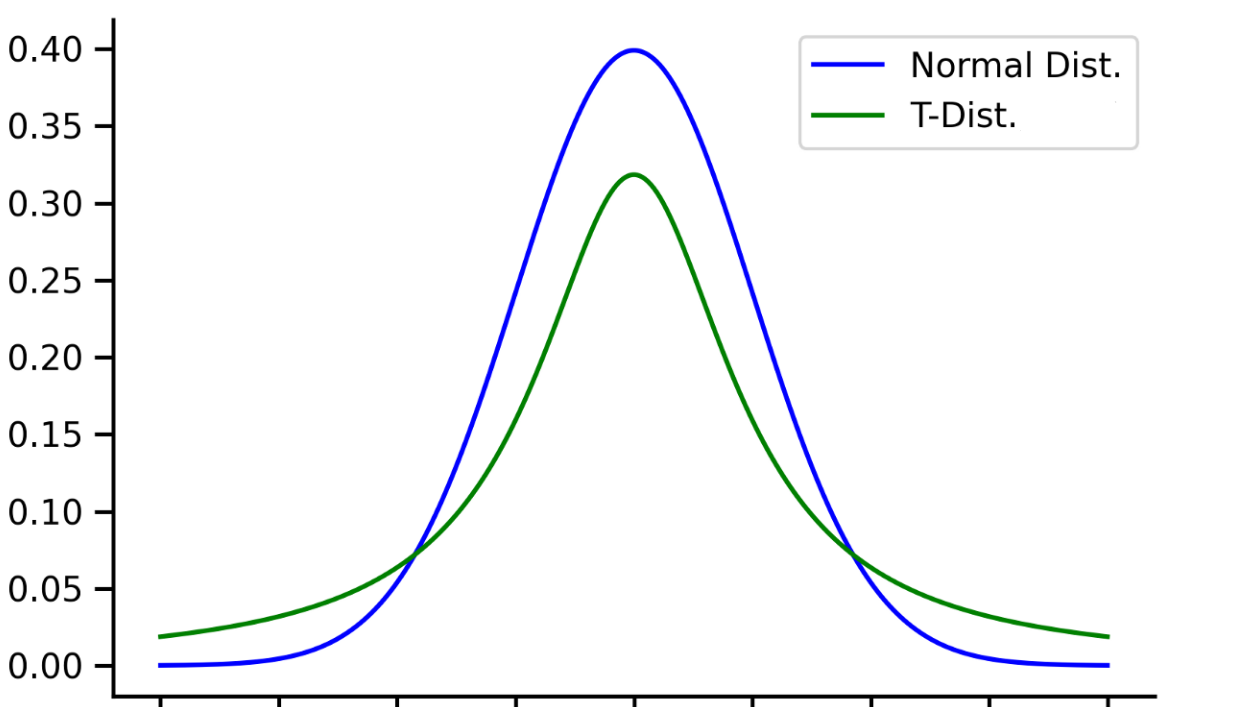

По оси ординат здесь отложены вероятности, а по оси абсцисс — стандартные отклонения.

В **t-SNE** используется именно распределение Стьюдента. Тогда показатель близости (вероятность) будет вычисляться следующим образом:
$$ q_{ij} = \frac{\big( 1 + \|y_i - y_j\|^2 \big)^{-1}}{\sum_{k \neq l}\big( 1 + \|y_k - y_l\|^2 \big)^{-1}} $$
Градиент функции потерь, соответственно, примет следующий вид:
$$ \frac{\partial C}{\partial y_i} = 4 \sum_j (p_{ij} - q_{ij})(y_i - y_j)(1+\|y_i - y_j\|^2)^{-1} $$
Для реализации t-SNE в sklearn понадобится алгоритм `manifold.TSNE()`:
```python
# импортируем класс TSNE из модуля manifold библиотеки sklearn
from sklearn.manifold import TSNE
# создаём объект класса TSNE
# n_components — размерность нового пространства
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
# обучаем модель на данных X и применяем к матрице X уменьшение размерности
tsne.fit_transform(X)
```
